# Titanic Dataset Classification Project
Dataset pulled from kaggle https://www.kaggle.com/c/titanic/data

In [222]:
# Import all neccesary libaries

# Python libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Scikit-learn model libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Scikit-learn evaluation metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve

In [119]:
# Import datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_sub = pd.read_csv('gender_submission.csv')

## Goal

Predicting likelihood of passenger survival on the Titanic based on their data

Build a predictive classification model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## Data Dictionary

* Survived:
    * 0 = No, 1 = Yes
* Pclass: Ticket class
    * 1 = Upper
    * 2 = Middle
    * 3 = Lower
* Sex:
    * Male, Female
* Age
* SibSp: # of siblings / spouses aboard the Titanic
* Parch: # of parents / children aboard the Titanic
* Ticket: Ticket number
* Fare: Fare price
* Cabin: Cabin number
* Embarked: Port of Embarkation
    * C = Cherbourg
    * Q = Queenstown
    * S = Southampton



## Exploratory Data Analysis (EDA)

In [120]:
# first 5 rows of each dataframe
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [121]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [25]:
gender_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [122]:
# Look at length of the dataset
train.shape, test.shape

((891, 12), (418, 11))

### Total rows and columns

- 891 rows and 12 columns in training dataset
- 418 rows and 11 columns in test dataset

In [123]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [30]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [34]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [35]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Let's look at each feature
Categorical features:
- Survived
- PClass
- Sex
- Embarked
- Cabin
- Ticket

Create bar charts to understand classes

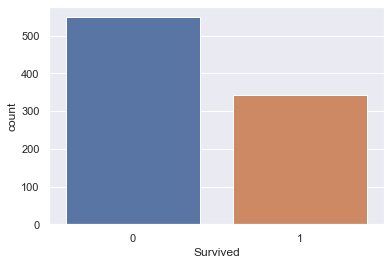

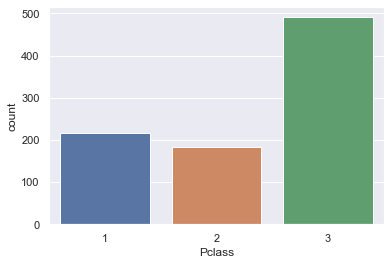

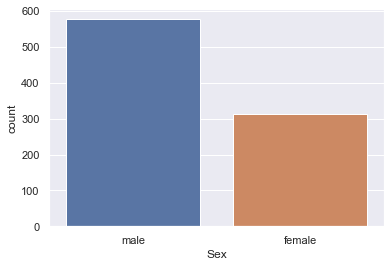

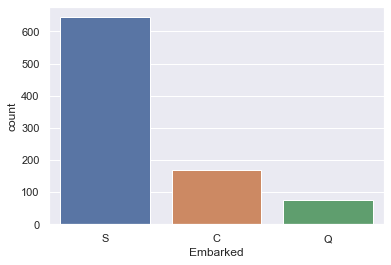

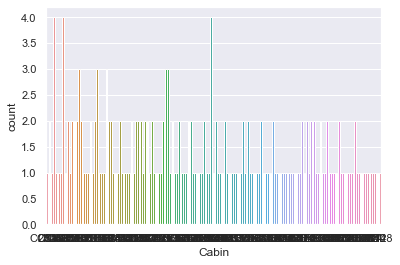

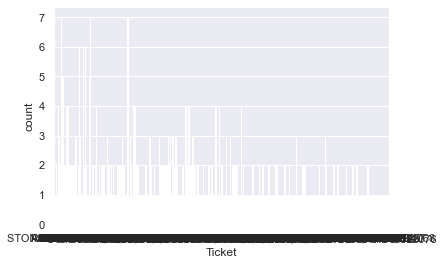

In [5]:
cat_feat = ['Survived', 'Pclass', 'Sex', 'Embarked', 'Cabin', 'Ticket'] 

for i in cat_feat: 
    sns.countplot(x=train[i])
    plt.show()

The Cabin and Ticket features are really messy, may or may not exclude.


Numerical features:
- Age
- SibSp
- Parch
- Fare

Create histograms to look at the distributions

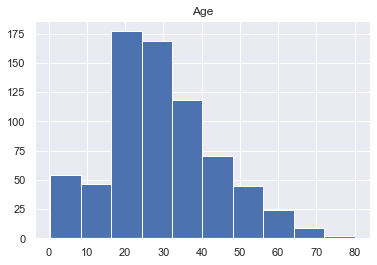

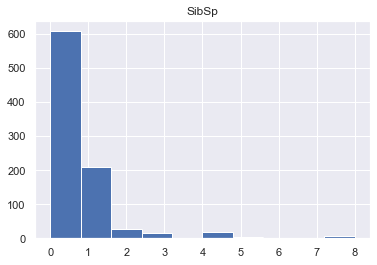

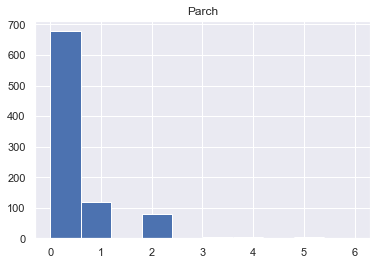

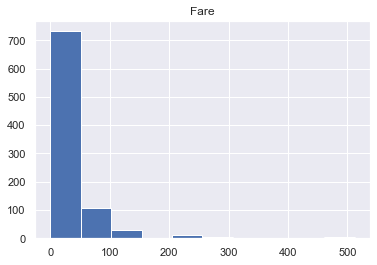

In [3]:
num_feat = ['Age', 'SibSp', 'Parch', 'Fare']

for i in num_feat:
    train[i].hist()
    plt.title(i)
    plt.show()

can consider normalizing Fare distribution

### Feature Correlation

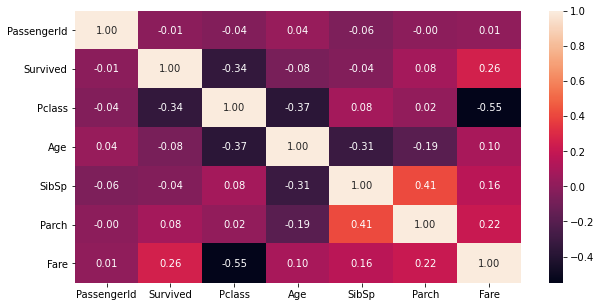

In [112]:
plt.figure(figsize=(10,5))
sns.heatmap(train.corr(),
            annot=True,
            fmt=".2f");

### Comparing survival and categorical features

In [54]:
def bar_graph(feature):
    Survived = train[train['Survived']==1][feature].value_counts()
    Died = train[train['Survived']==0][feature].value_counts()
    survived_class = pd.DataFrame([Survived, Died], 
                                  index=['Survived', 'Died'])
    survived_class.plot.bar(stacked=True)
    plt.title(f"Survived/Died by {feature}")

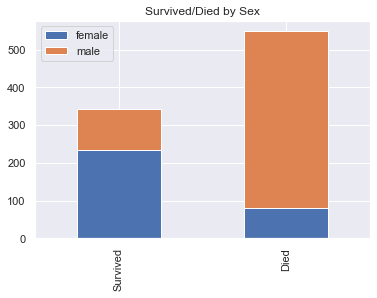

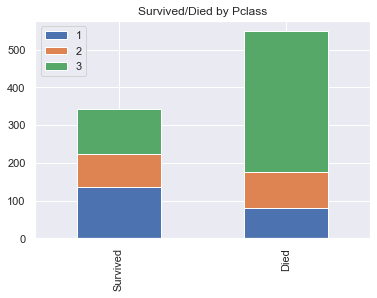

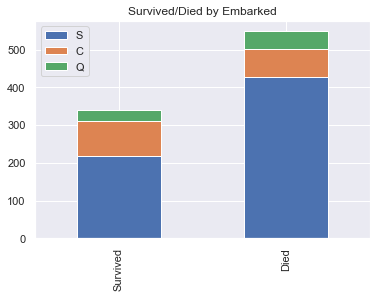

In [101]:
for i in ['Sex', 'Pclass', 'Embarked']:
    bar_graph(i)

Females and first class are more likely to survive

### Feature Engineering

#### Name
Let's extract the title (i.e. Mr.) from the 'Name' columns

In [124]:
all_data = [train, test]
for dataset in all_data:
    dataset['Title'] = dataset['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
    
train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Lady              1
Don               1
Capt              1
Jonkheer          1
Mme               1
Sir               1
the Countess      1
Ms                1
Name: Title, dtype: int64

In [52]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

In [133]:
# Let's combined some titles into groups
title_mapping = {"Mlle": "Miss",
                 "Mr": "Mr",
                 "Miss": "Miss",
                 "Mrs": "Mrs",
                 "Master": "Master",
                 "Major": "Officer",
                 "Mme": "Miss",
                 "Sir": "Royalty",
                 "the Countess": "Royalty",
                 "Ms": "Miss",
                 "Col": "Officer",
                 "Major": "Officer",
                 "Jonkheer": "Royalty",
                 "Don": "Royalty",
                 "Dona": "Royalty",
                 "Capt": "Officer",
                 "Lady": "Royalty",
                 "Rev": "Rev",
                 "Dr": "Dr"}

train['Title'] = train['Title'].map(title_mapping)
test['Title'] = test['Title'].map(title_mapping);

**Embarked**

Fill in missing values with the most common value

In [136]:
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [135]:
for datasets in all_data:
    datasets.Embarked.fillna('S', inplace=True)

**Age**

Fill in missing values with average Age based on Pclass & Sex. Train set must be filled separately from Test set.

In [201]:
by_pclass_sex = train.Age.groupby([train['Pclass'], train['Sex']]).mean()
by_pclass_sex 

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

In [206]:
train['Age'] = train.Age.groupby([train['Pclass'], train['Sex']]).apply(lambda x: x.fillna(x.mean()))

In [208]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [214]:
test['Age'] = test.Age.groupby([test['Pclass'], test['Sex']]).apply(lambda x: x.fillna(x.mean()))

In [215]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

**Fare**

Fill missing Fare

In [217]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

In [218]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64

### Modelling

In [209]:
# Create X & y
X_train = train.drop(['PassengerId', 'Cabin', 'Name', 'Survived', 'Ticket'],
                     axis=1)
y_train = train.Survived
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,22.0,1,0,7.2500,S,Mr
1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,female,26.0,0,0,7.9250,S,Miss
3,1,female,35.0,1,0,53.1000,S,Mrs
4,3,male,35.0,0,0,8.0500,S,Mr


In [211]:
cat_features= ['Sex', 'Embarked', 'Title']
ohe = OneHotEncoder()
transformer = ColumnTransformer([
    ("ohe", ohe, cat_features)],
    remainder='passthrough')
transformed_X = transformer.fit_transform(X_train)

In [212]:
clf = RandomForestClassifier()
clf.fit(transformed_X, y_train);

In [219]:
X_test = test.drop(['PassengerId', 'Cabin', 'Name', 'Ticket'], axis=1)
test['Survived'] = np.nan
y_test = test.Survived

In [223]:
cat_features= ['Sex', 'Embarked', 'Title']
ohe = OneHotEncoder()
transformer = ColumnTransformer([
    ("ohe", ohe, cat_features)],
    remainder='passthrough')
transformed_X_test = transformer.fit_transform(X_test)

accuracies = cross_val_score(clf, transformed_X, y_train, cv=10)

In [225]:
np.mean(accuracies)

0.8092759051186018